In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.stats.api as sms

In [2]:
class Bandit:
    def __init__(self, k, eps, draws, mu):
        self.k = k  # Number of arms
        self.eps = eps  # Search probability
        self.draws = draws  # Number of draws
        self.mu = np.array(mu)

        self.n = 0  # Step count
        self.k_n = np.zeros(k)  # Step count for each arm

        self.rewards = np.zeros(draws)
        self.cum_rewards = np.zeros(draws)
    
        self.total_cum_reward = 0 # Total cumulative reward
        self.total_cum_k_reward = np.zeros(k)  # Total cumulative reward for each arm
        self.avg_k_reward = np.zeros(k)

    def pull(self):
        p = np.random.rand()
        if self.eps == 0 and self.n == 0:
            a = np.random.choice(self.k)
        elif p < self.eps:
            # Randomly select an action
            a = np.random.choice(self.k)
        else:
            # Take greedy action
            a = np.argmax(self.avg_k_reward)
        
        if np.random.random() < self.mu[a]:
            reward = 1
        else:
            reward = 0

        # Update counts
        self.n += 1
        self.k_n[a] += 1

        # Update total
        self.total_cum_reward += reward
        
        # Update results for a_k
        self.total_cum_k_reward[a] += reward
        self.avg_k_reward[a] = self.total_cum_k_reward[a] / self.k_n[a]
        
        return reward
    
    def run(self):
        for i in range(self.draws):
            reward = self.pull()
            self.rewards[i] = reward
            self.cum_rewards += reward

In [3]:
k = 2
draws = 1000

eps_0_rewards = np.zeros(draws)
eps_01_rewards = np.zeros(draws)
eps_03_rewards = np.zeros(draws)

simulations = 2000

eps_0_cum_rewards = np.zeros(simulations)
eps_01_cum_rewards = np.zeros(simulations)
eps_03_cum_rewards = np.zeros(simulations)

# Run experiment
for i in range(simulations):
    eps_0 = Bandit(k, 0, draws, [0.05, 0.1])
    eps_01 = Bandit(k, 0.1, draws, [0.05, 0.1])
    eps_03 = Bandit(k, 0.3, draws, [0.05, 0.1])

    eps_0.run()
    eps_01.run()
    eps_03.run()

    eps_0_cum_rewards[i] = eps_0.total_cum_reward
    eps_01_cum_rewards[i] = eps_01.total_cum_reward
    eps_03_cum_rewards[i] = eps_03.total_cum_reward

In [4]:
total_reward_0 = 0
total_reward_01 = 0
total_reward_03 = 0

for i in range(simulations):
    total_reward_0 += eps_0_cum_rewards[i]
    total_reward_01 += eps_01_cum_rewards[i]
    total_reward_03 += eps_03_cum_rewards[i]

average_0 = total_reward_0 / simulations
average_01 = total_reward_01 / simulations
average_03 = total_reward_03 / simulations


print(average_0)
print(average_01)
print(average_03)

52.3785
84.042
88.0905


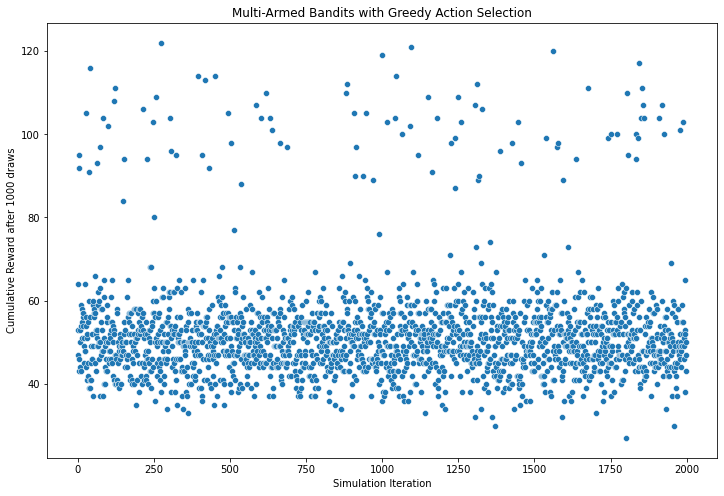

In [5]:
plt.figure(figsize=(12,8))
graph = sns.scatterplot(data=eps_0_cum_rewards)
plt.xlabel('Simulation Iteration');
plt.ylabel('Cumulative Reward after {} draws'.format(draws));
plt.title('Multi-Armed Bandits with Greedy Action Selection');

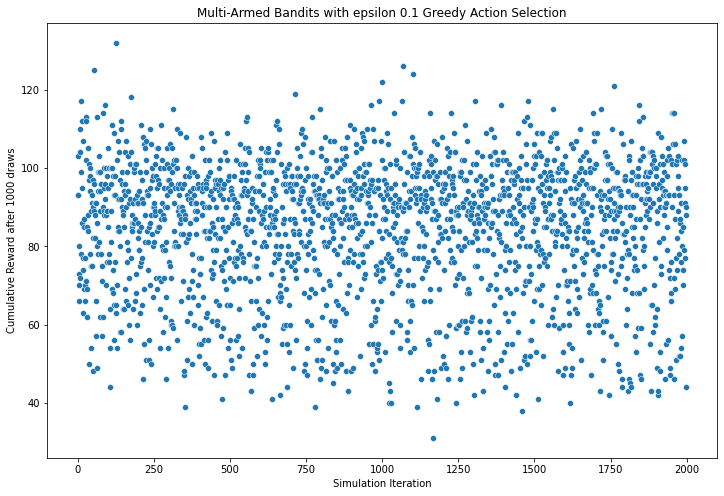

In [6]:
plt.figure(figsize=(12,8))
graph = sns.scatterplot(data=eps_01_cum_rewards)
plt.xlabel('Simulation Iteration');
plt.ylabel('Cumulative Reward after {} draws'.format(draws));
plt.title('Multi-Armed Bandits with epsilon 0.1 Greedy Action Selection');

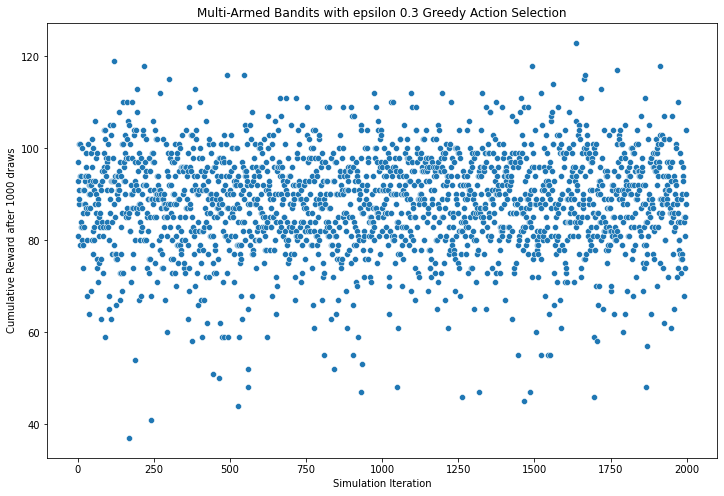

In [7]:
plt.figure(figsize=(12,8))
graph = sns.scatterplot(data=eps_03_cum_rewards)
plt.xlabel('Simulation Iteration');
plt.ylabel('Cumulative Reward after {} draws'.format(draws));
plt.title('Multi-Armed Bandits with epsilon 0.3 Greedy Action Selection');